# Section 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load the provided data files
# NOTE: THE "test.csv" is for the Kaggle submission and is missing the
# SalePrice feature inheriently since the model is supposed to predict it.
train_data_path = 'train.csv'
test_data_path = 'test.csv'

# Reading the data into pandas dataframes
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Displaying the first few rows of each dataframe to understand the structure of the data
train_head = train_df.head()
test_head = test_df.head()

train_head, test_head


(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

# Section 2: Exploratory Data Analysis

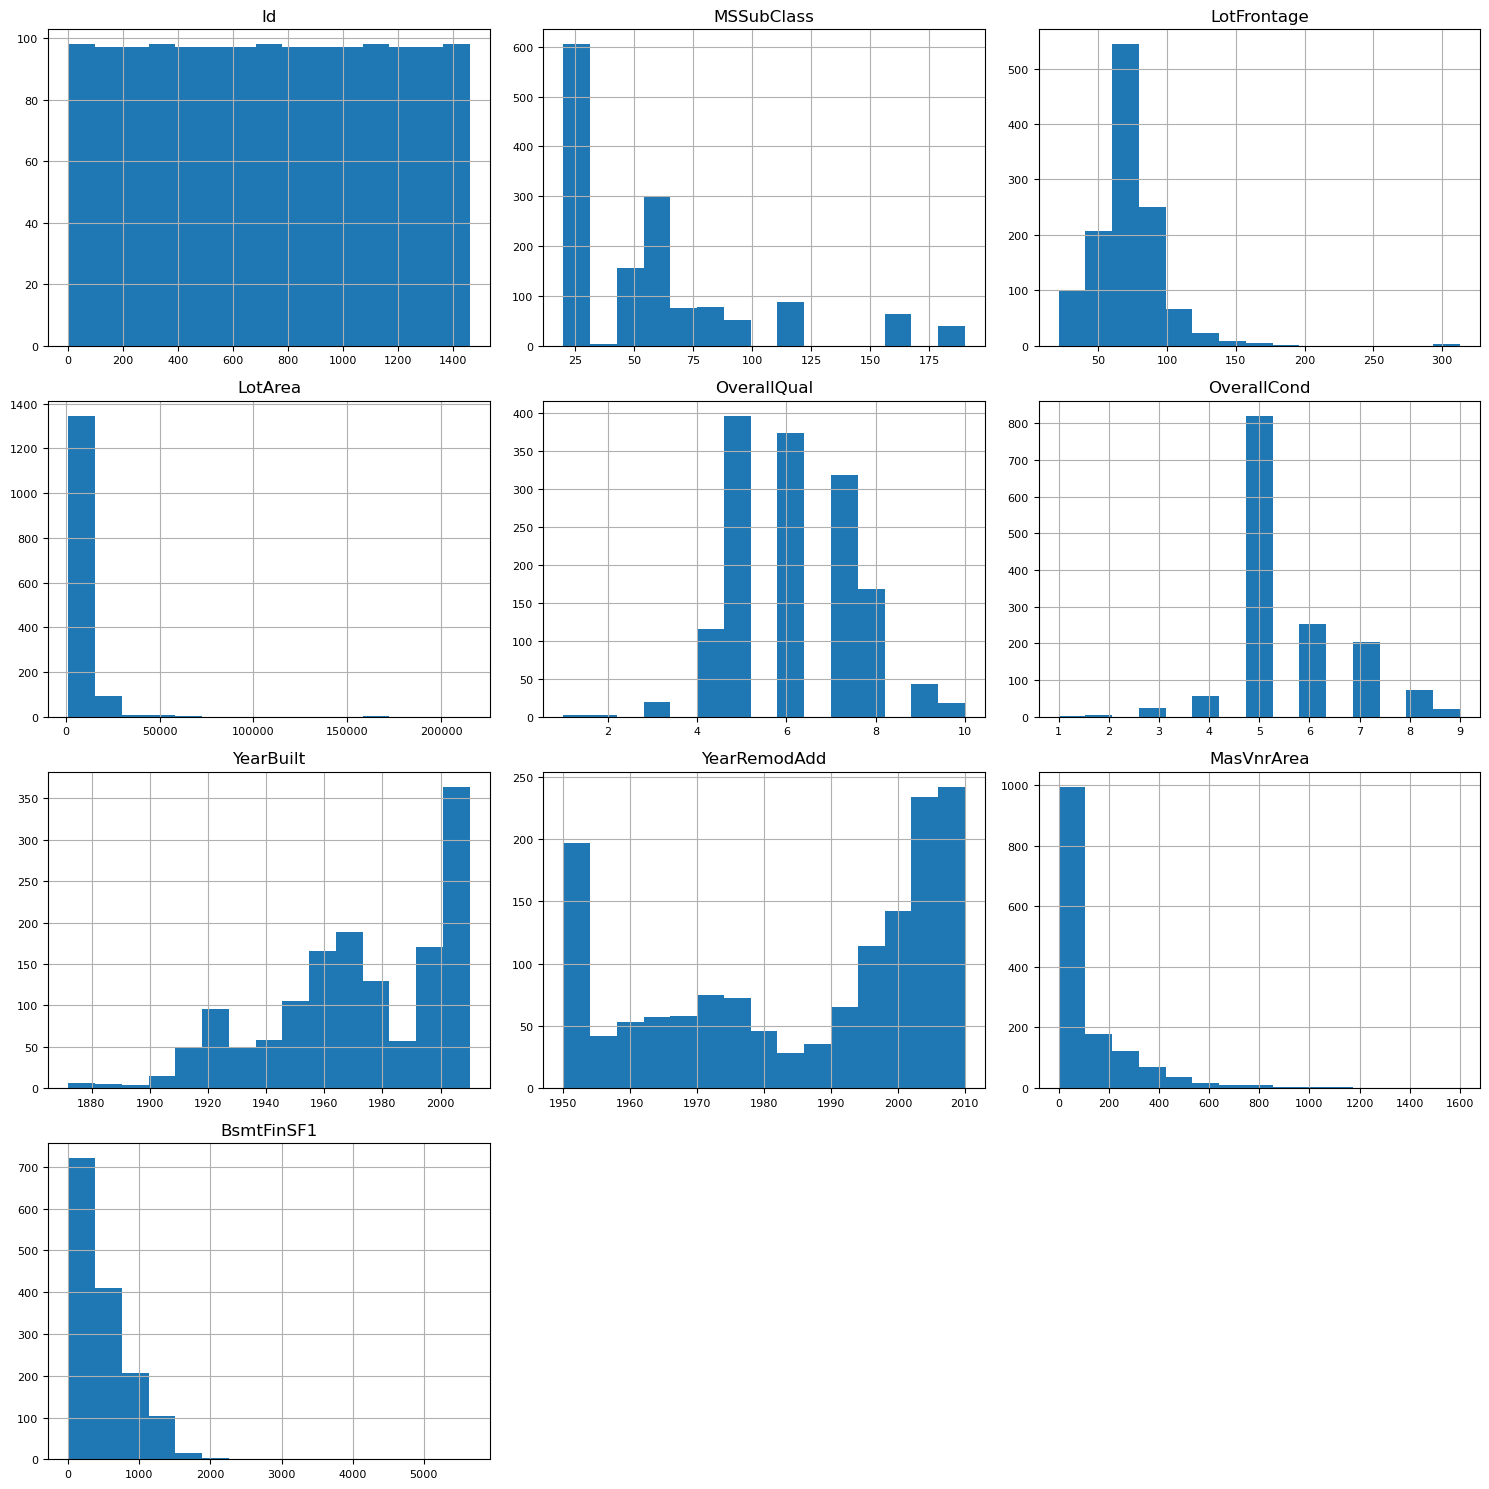

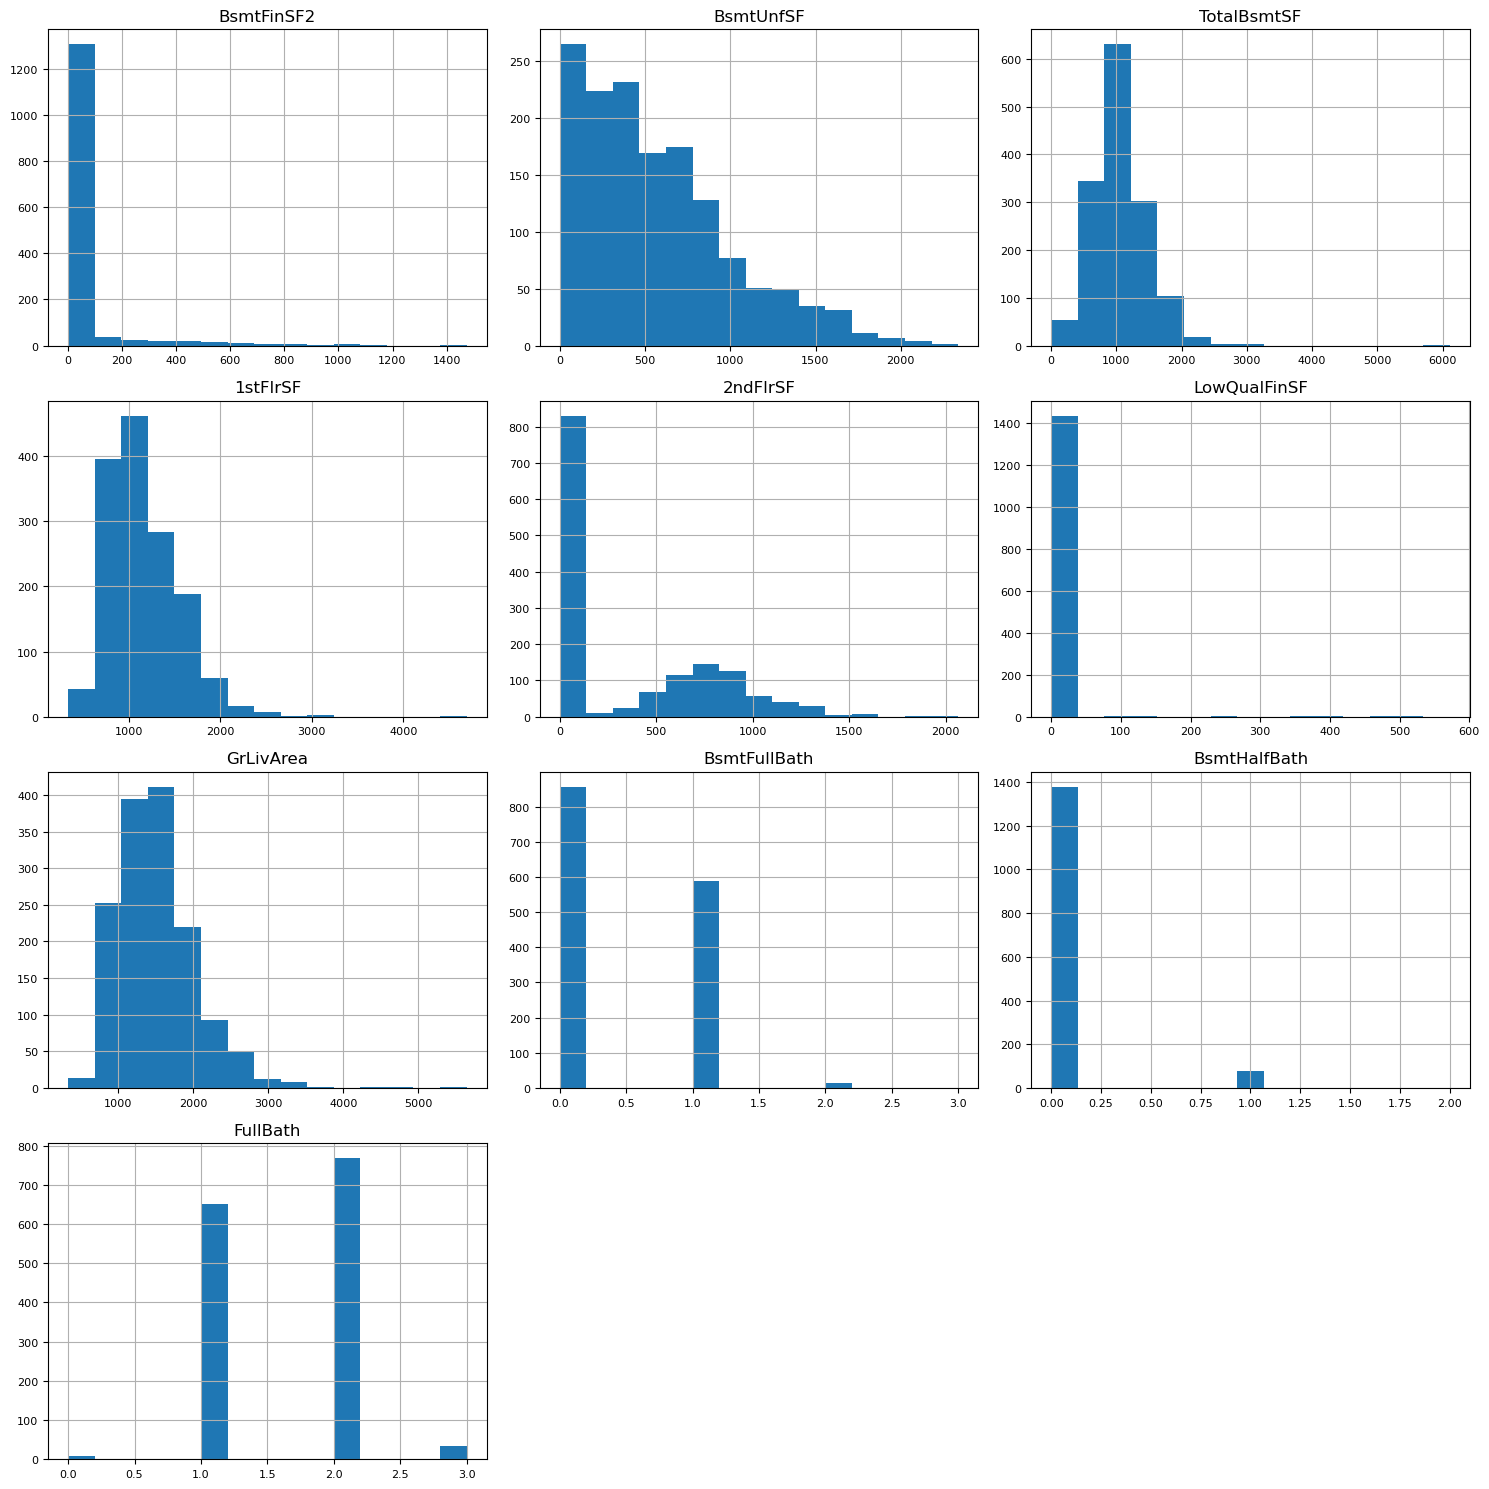

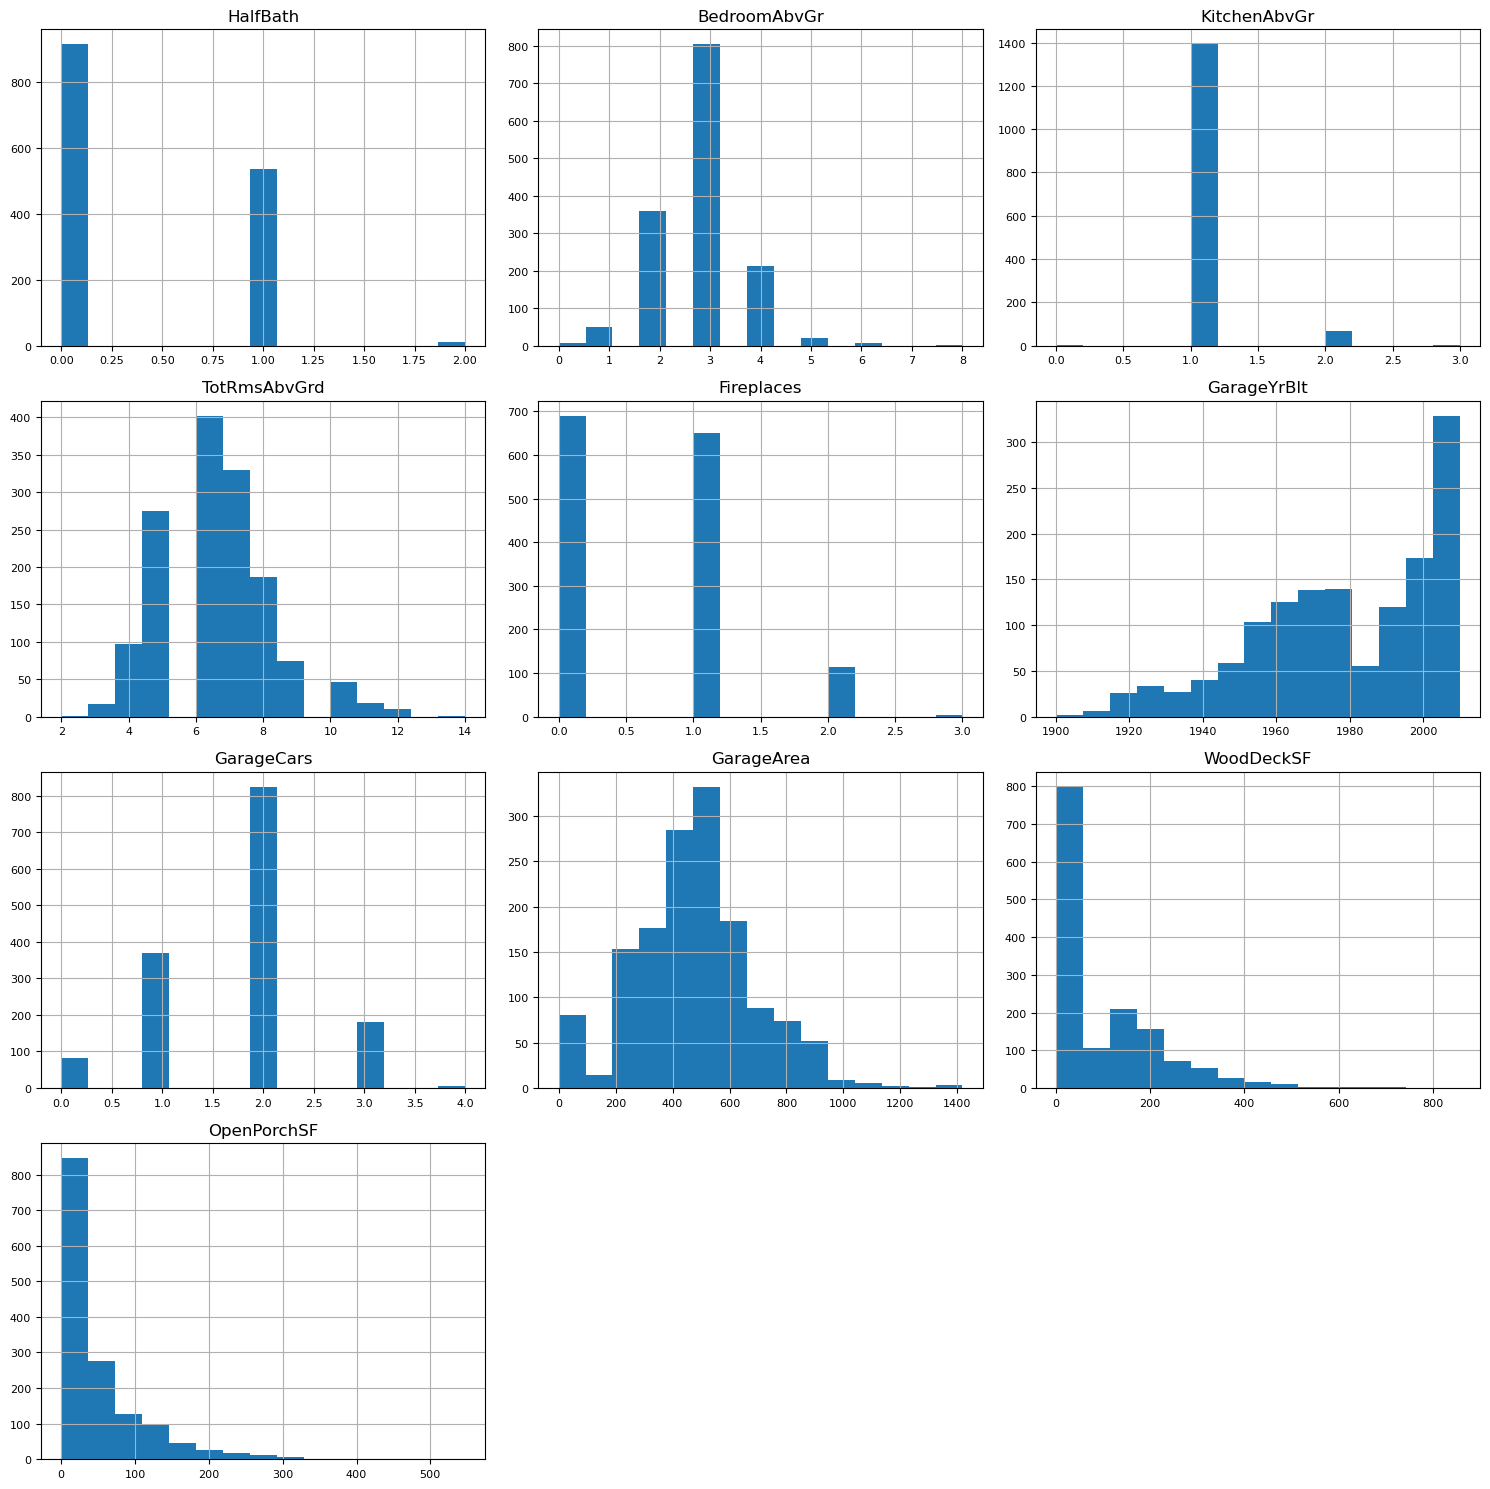

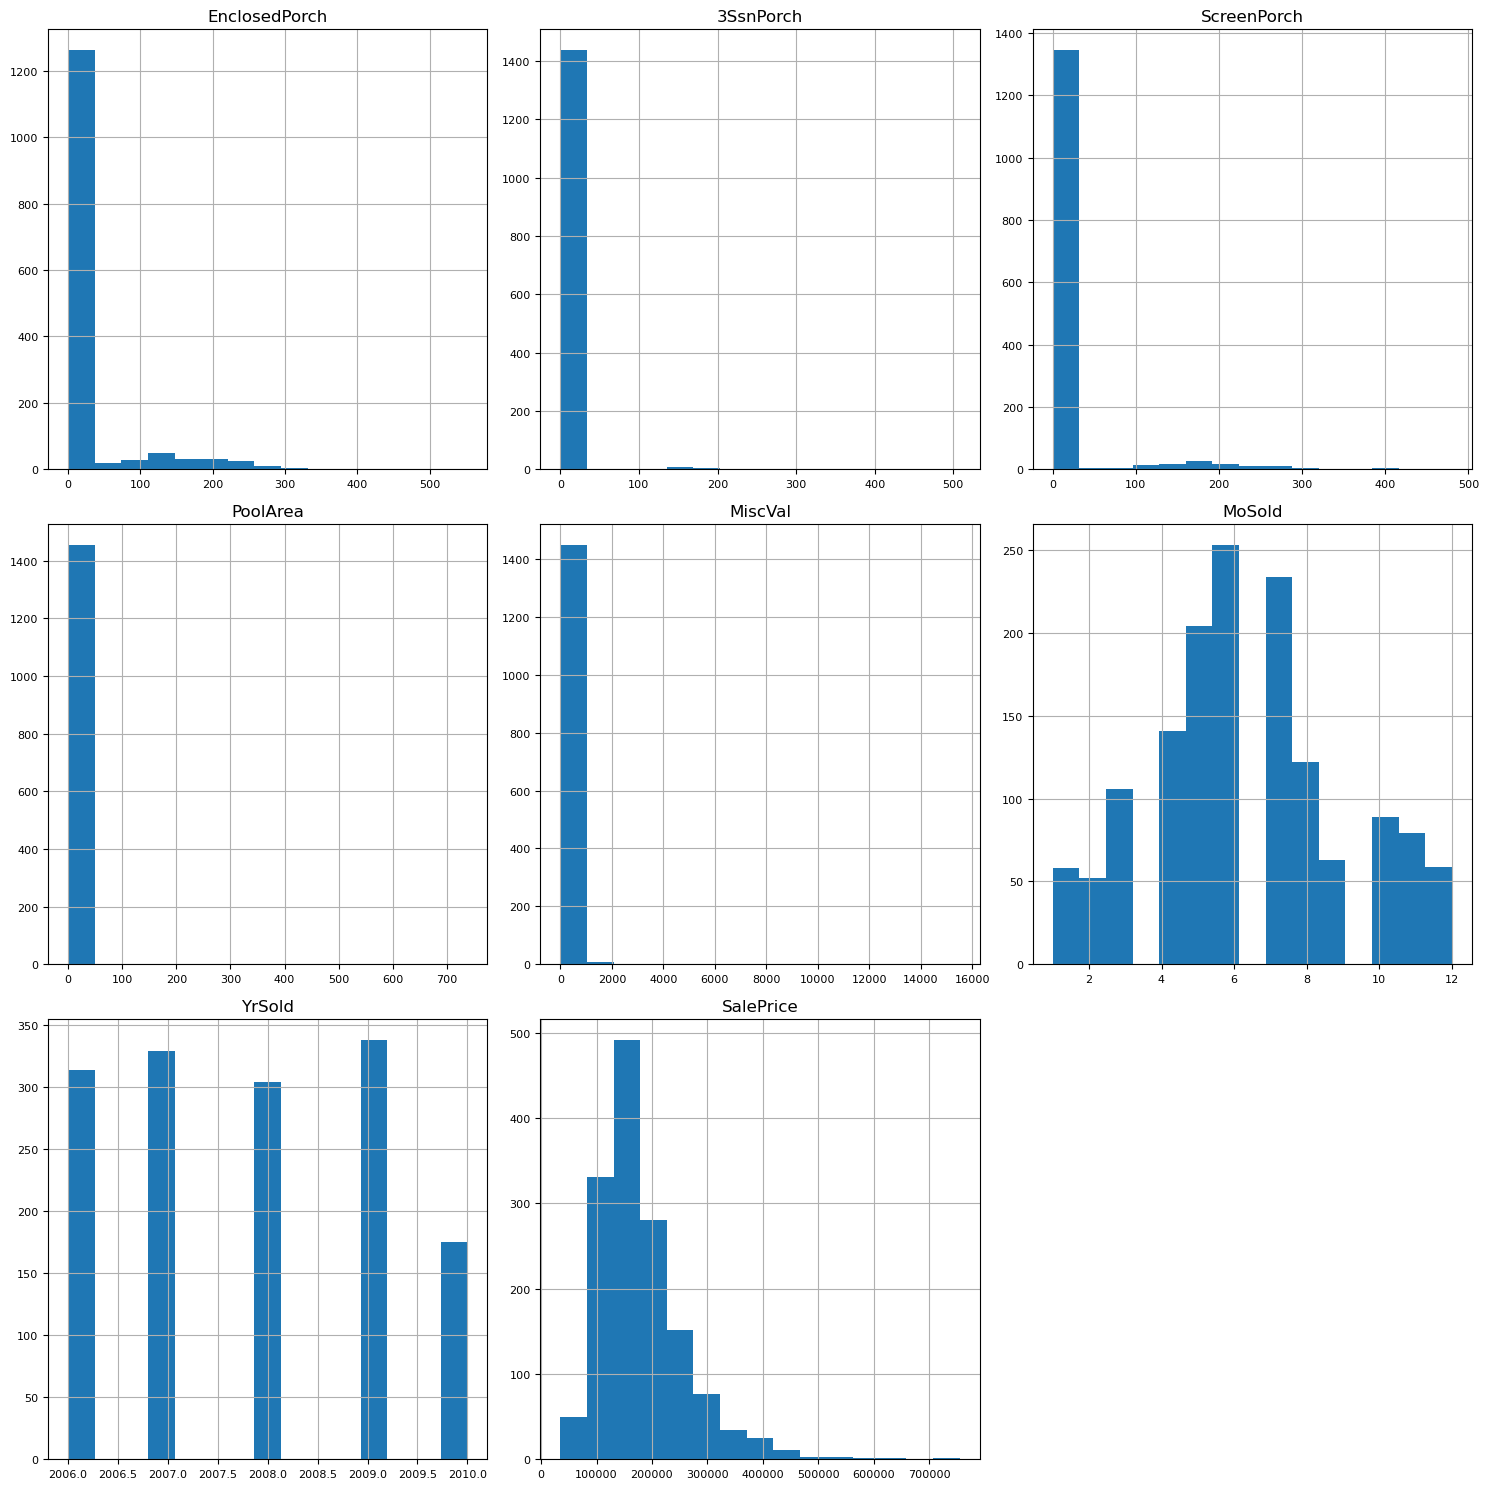

In [3]:
# Define number of features per figure for visualization
features_per_figure = 10
num_features = train_df.select_dtypes(include=[np.number]).columns
total_features = len(num_features)
total_figures = (total_features + features_per_figure - 1) // features_per_figure

# Generate histogram figures
for i in range(total_figures):
    start_idx = i * features_per_figure
    end_idx = min(start_idx + features_per_figure, total_features)
    subset_features = num_features[start_idx:end_idx]
    train_df[subset_features].hist(bins=15, figsize=(15, 15), xlabelsize=8, ylabelsize=8)
    plt.tight_layout()
    plt.show()

# Section 3: Correlation Analysis

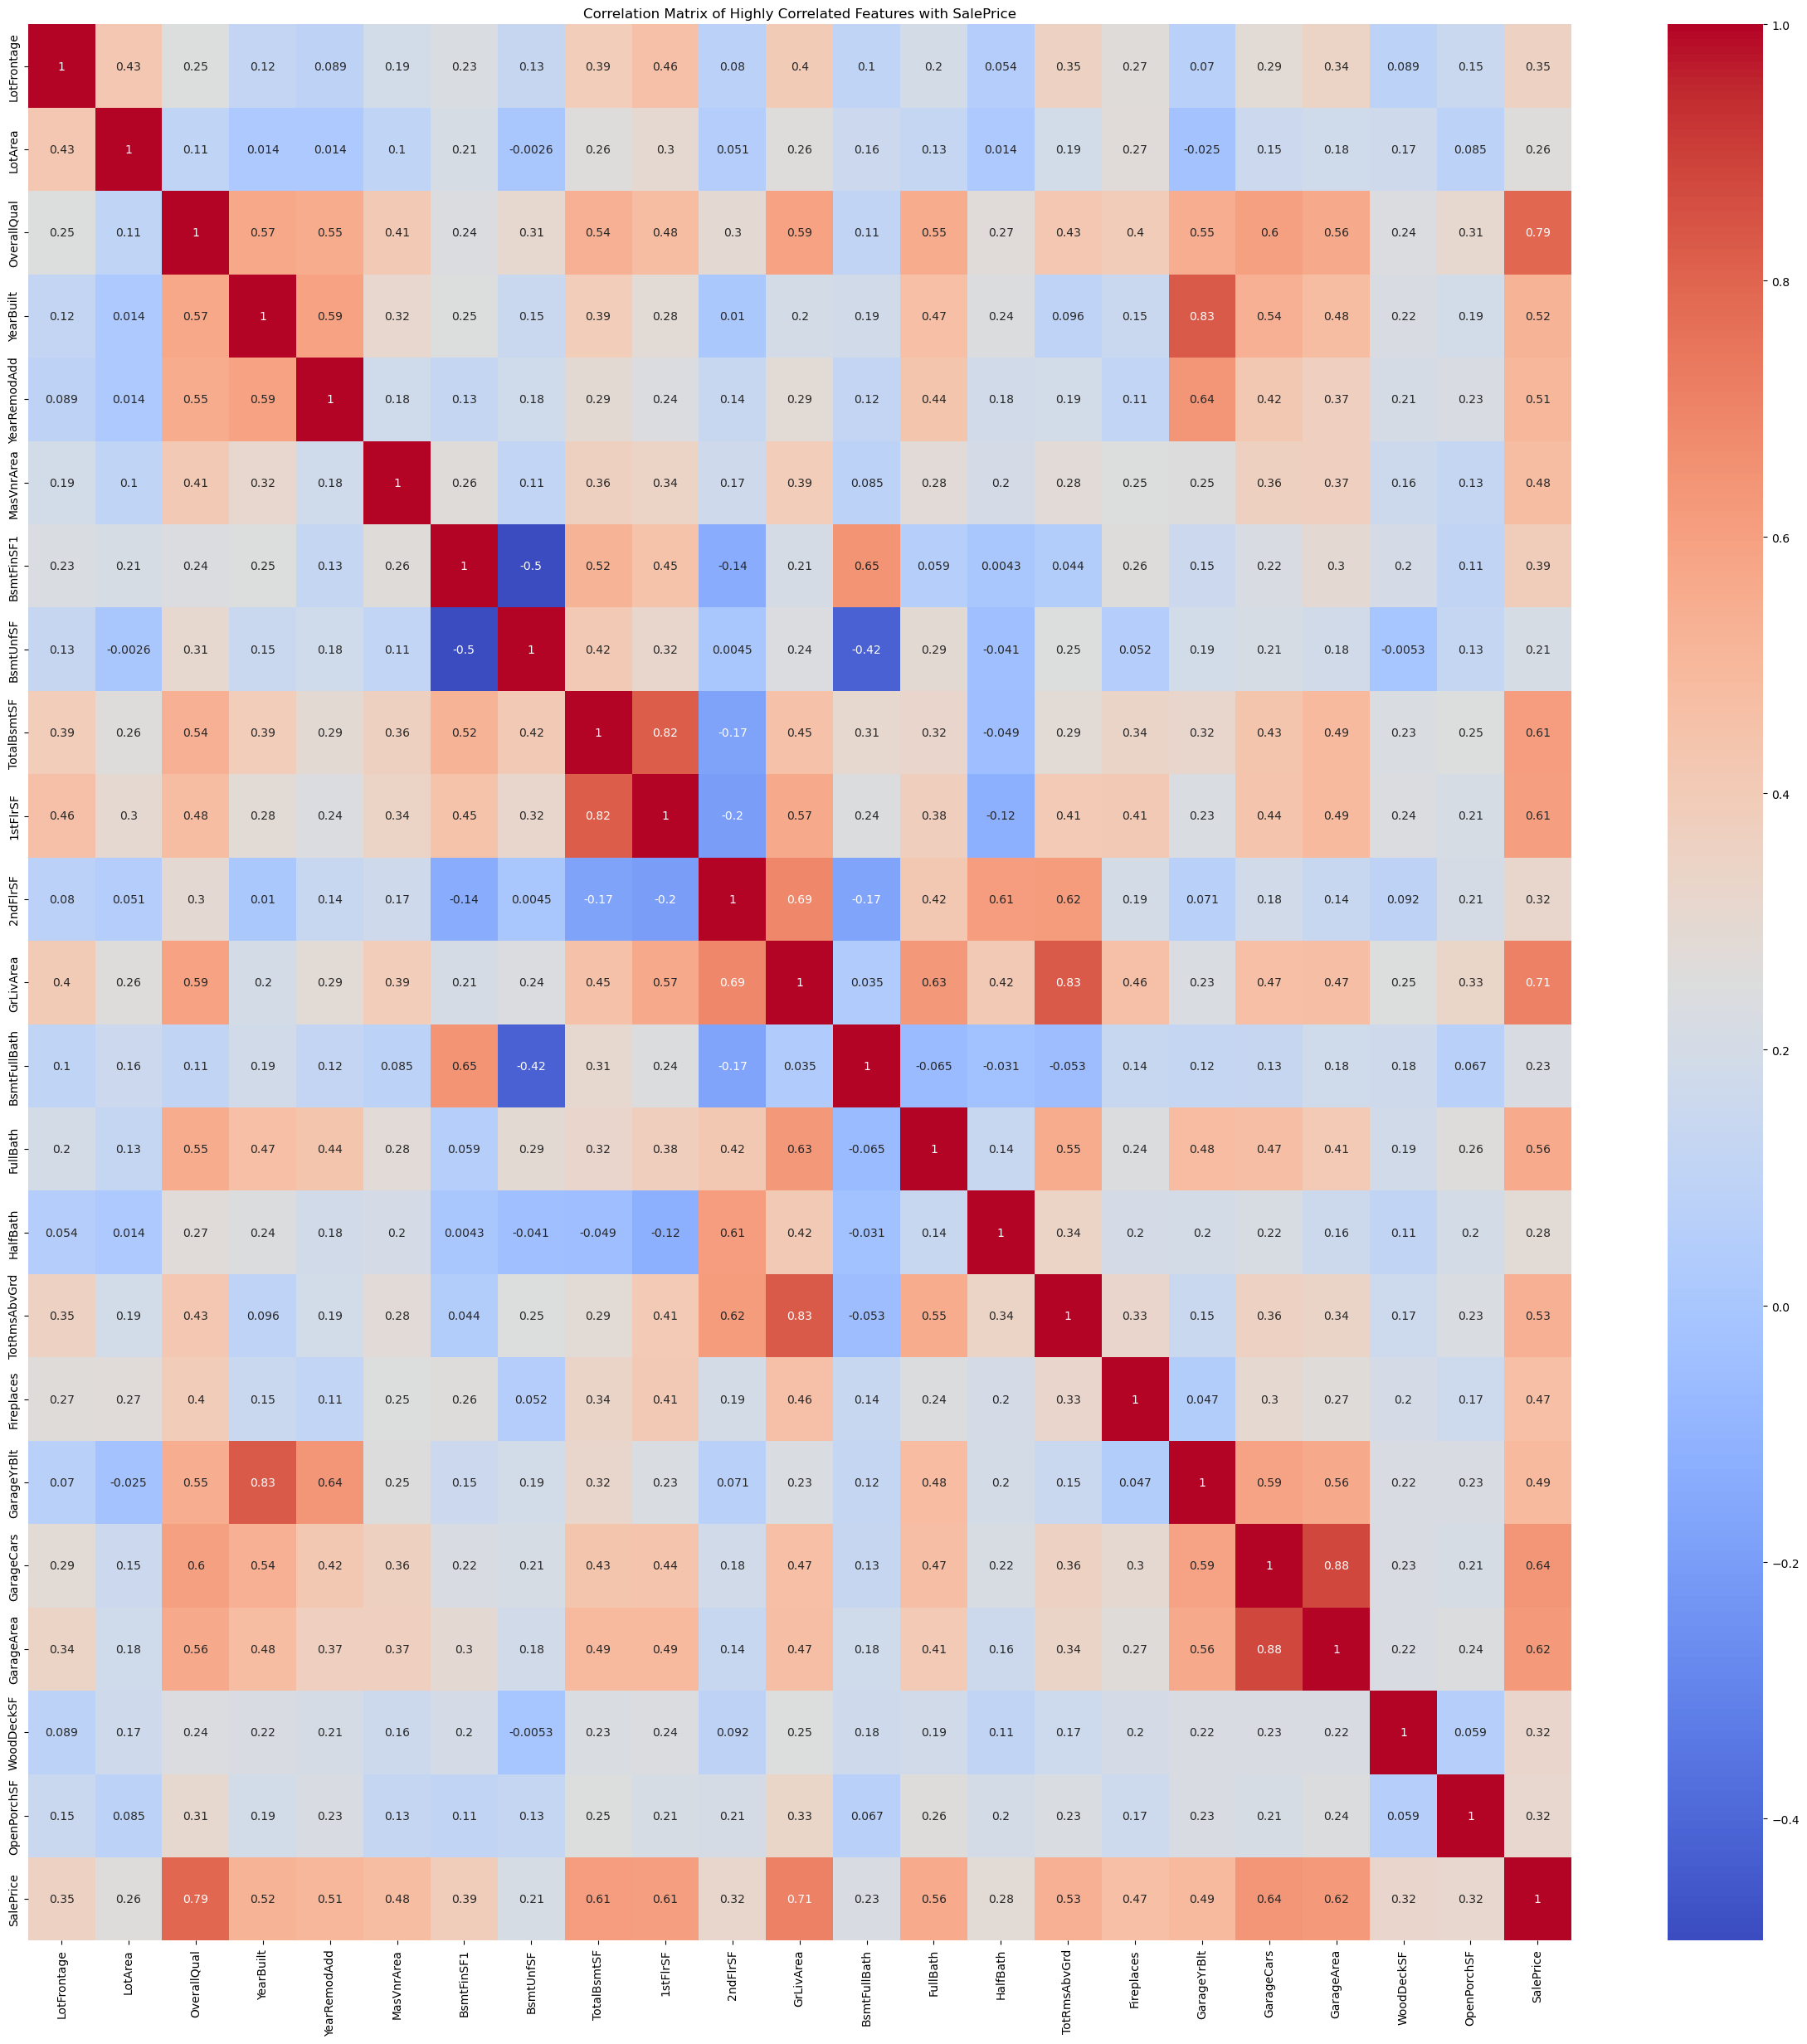

In [4]:
# Filtering out non-numerical data before computing the correlation matrix
numerical_train_df = train_df.select_dtypes(include=['int64', 'float64'])

# Recomputing the correlation matrix with only numerical data
correlation = numerical_train_df.corr()
high_corr_features = correlation.index[abs(correlation['SalePrice']) > 0.2]

# Plotting the heatmap for highly correlated features
plt.figure(figsize=(30, 30))
sns.heatmap(numerical_train_df[high_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Highly Correlated Features with SalePrice")
plt.show()

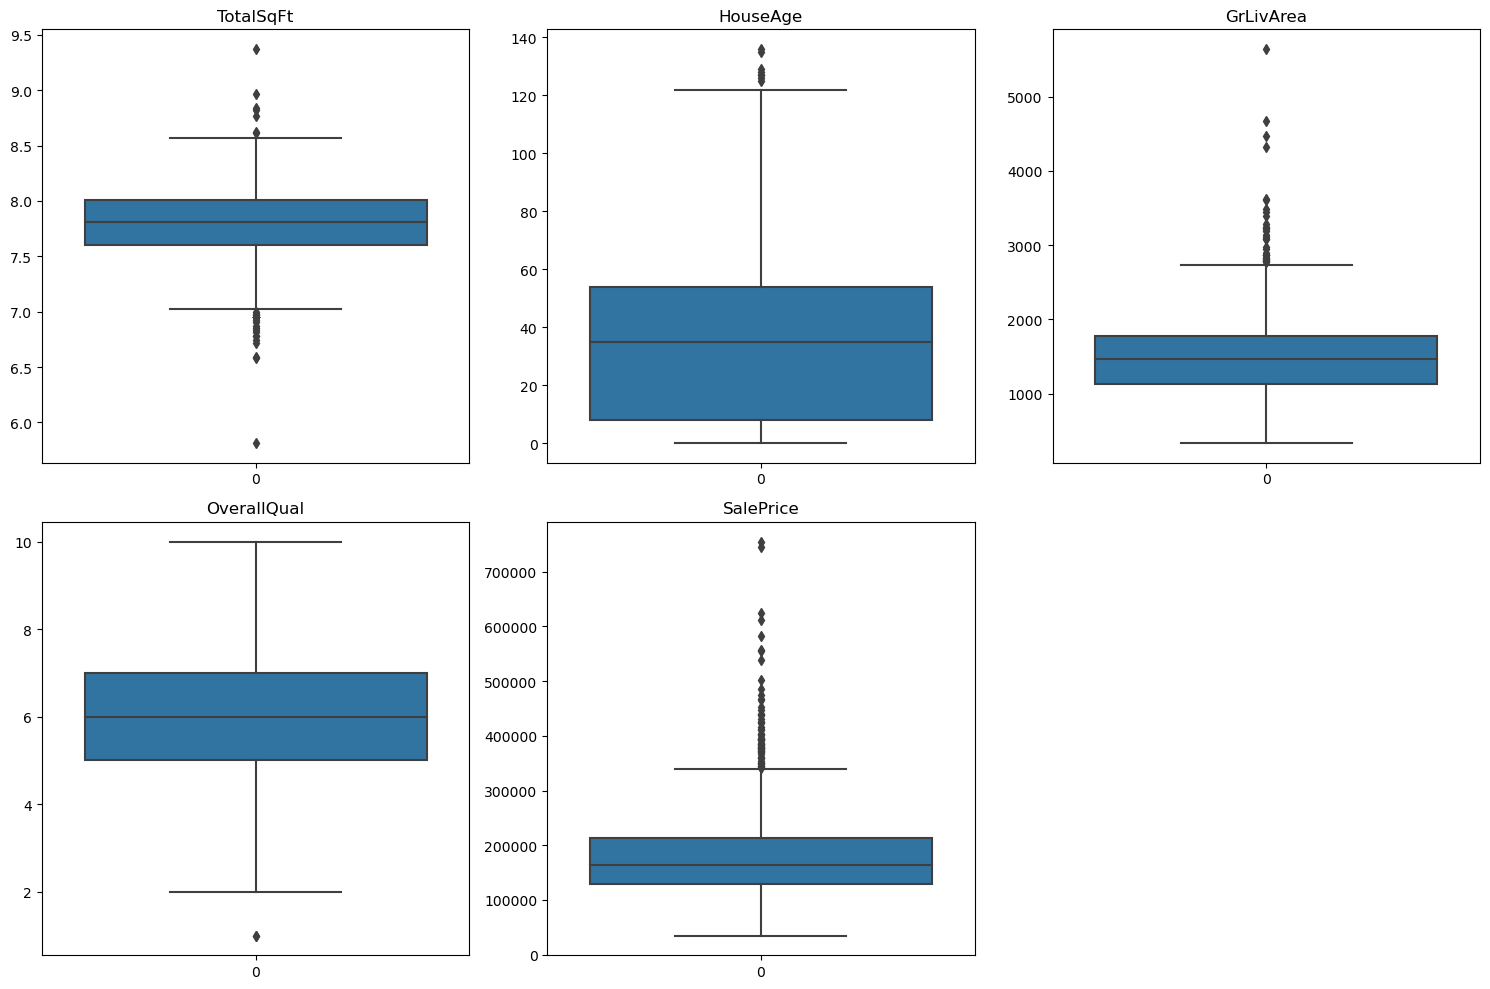

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
train_df = pd.read_csv(train_data_path)

# Apply feature engineering and categorical encoding as previously done
train_df['TotalSqFt'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSqFt'] = np.log1p(train_df['TotalSqFt'])
train_df['LotArea'] = np.log1p(train_df['LotArea'])

# Visual inspection of potential outliers in key features
key_features = ['TotalSqFt', 'HouseAge', 'GrLivArea', 'OverallQual', 'SalePrice']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(train_df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


# Section 4: Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

# Reloading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatinate the datasets to one dataset and check the shape
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

# Checking for missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.head(20))

# Handling missing values, some missing values were filled Na beacause there for example
# Wasn't a pool on the property, when it should say None, indicating that there wasn't a pool.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

# Checking for missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.head())

# MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
# Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

# Selecting some categorical features to covert to numerical
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# This line of code was used to select ALL categorical features
# cols = all_data.select_dtypes(include=['object', 'category']).columns

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Creating new Features     
print('Shape all_data: {}'.format(all_data.shape))
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# For the categorical features that were left out during the numerical conversion we create dummies instead
all_data = pd.get_dummies(all_data, drop_first=True)

# Splitting the data back to "training" and "test" datasets
train_df = pd.concat([all_data[:ntrain],y_train],axis=1)
test_df = all_data[ntrain:]
train_df, test_df

all_data size is : (2919, 80)
              Missing Ratio
PoolQC            99.657417
MiscFeature       96.402878
Alley             93.216855
Fence             80.438506
MasVnrType        60.500171
FireplaceQu       48.646797
LotFrontage       16.649538
GarageFinish       5.447071
GarageQual         5.447071
GarageCond         5.447071
GarageYrBlt        5.447071
GarageType         5.378554
BsmtExposure       2.809181
BsmtCond           2.809181
BsmtQual           2.774923
BsmtFinType2       2.740665
BsmtFinType1       2.706406
MasVnrArea         0.787941
MSZoning           0.137033
BsmtFullBath       0.068517
Empty DataFrame
Columns: [Missing Ratio]
Index: []
Shape all_data: (2919, 79)


(        Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  \
 0        1          10         65.0     8450       1      1         3   
 1        2           5         80.0     9600       1      1         3   
 2        3          10         68.0    11250       1      1         0   
 3        4          11         60.0     9550       1      1         0   
 4        5          10         84.0    14260       1      1         0   
 ...    ...         ...          ...      ...     ...    ...       ...   
 1455  1456          10         62.0     7917       1      1         3   
 1456  1457           5         85.0    13175       1      1         3   
 1457  1458          11         66.0     9042       1      1         3   
 1458  1459           5         68.0     9717       1      1         3   
 1459  1460           5         75.0     9937       1      1         3   
 
       LandSlope  OverallQual  OverallCond  ...  SaleType_ConLw  SaleType_New  \
 0             0            7

In [7]:
# This was one of the first pre-processing functions that was used
def vanilla_dataset_preprocessing(X):
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['number']).columns
    
    # Create transformers for numerical and categorical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine transformers into a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
    ])
    
    # return preprocessing
    return preprocessor

# Section 5: Outlier Detection and Removal

In [8]:
# Outlier Detection and Removal
# Using the Interquartile Range (IQR) method to detect and individually remove outliers
def remove_individual_outliers(df, columns):
    for column in columns:
        Q1 = np.percentile(df[column], 2)
        
        Q3 = np.percentile(df[column], 98)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = 1.5 * IQR
        
        # Filtering the outliers from the dataframe
        df = df[(df[column] >= Q1 - outlier_step) & (df[column] <= Q3 + outlier_step)]
    
    return df

# Selecting numerical columns for outlier removal
numerical_cols = train_df.select_dtypes(include=[np.number]).columns

# Removing individual outliers from the dataset
train_df = remove_individual_outliers(train_df, numerical_cols)

train_df

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,10,65.0,8450,1,1,3,0,7,4,...,False,False,False,True,False,False,False,True,False,208500
1,2,5,80.0,9600,1,1,3,0,6,7,...,False,False,False,True,False,False,False,True,False,181500
2,3,10,68.0,11250,1,1,0,0,7,4,...,False,False,False,True,False,False,False,True,False,223500
3,4,11,60.0,9550,1,1,0,0,7,4,...,False,False,False,True,False,False,False,False,False,140000
4,5,10,84.0,14260,1,1,0,0,8,4,...,False,False,False,True,False,False,False,True,False,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,5,62.0,7500,1,2,3,0,7,4,...,False,False,False,True,False,False,False,True,False,185000
1455,1456,10,62.0,7917,1,1,3,0,6,4,...,False,False,False,True,False,False,False,True,False,175000
1456,1457,5,85.0,13175,1,1,3,0,6,5,...,False,False,False,True,False,False,False,True,False,210000
1458,1459,5,68.0,9717,1,1,3,0,5,5,...,False,False,False,True,False,False,False,True,False,142125


# Section 6: Remove columns who have high coorelation

In [9]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iteratively remove features with high VIF
dropped_features = []
vif_threshold = 12
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.drop(["Id", "SalePrice"], axis=1, inplace=True)
while True:
    vif_data = calculate_vif(numerical_features)
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        feature_to_drop = vif_data[vif_data['VIF'] == max_vif]['feature'].values[0]
        numerical_features.drop(columns=[feature_to_drop], inplace=True)
        train_df.drop(columns=[feature_to_drop], inplace=True)
        print(f"Dropping: {feature_to_drop} with VIF: {max_vif}")
        dropped_features.append(feature_to_drop)
    else:
        break

# Dropping the same columns in test_df
for feat in dropped_features:
    test_df = test_df.drop(feat, axis=1)

C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: YearBuilt with VIF: inf
Dropping: BsmtFinSF1 with VIF: inf


C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:

Dropping: TotalBsmtSF with VIF: inf
Dropping: 1stFlrSF with VIF: inf


C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered

Dropping: GrLivArea with VIF: 30.5596413915263


C:\Users\eggr20\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


# Section 7: Feature scaling

In [10]:
scaler = StandardScaler()

# Separating Id and SalePrice from the datset
temp_df = train_df.drop(columns=["Id", "SalePrice"])
temp_id_sp = pd.DataFrame()
temp_id_sp["Id"] = train_df["Id"]
temp_id_sp["SalePrice"] = train_df["SalePrice"]

# Scale the remaining features
scaled_features = scaler.fit_transform(temp_df)

# Reassembly of dataset
scaled_df = pd.DataFrame(scaled_features, columns=temp_df.columns)
scaled_df.insert(0, "Id", temp_id_sp["Id"].values)
scaled_df["SalePrice"] = temp_id_sp["SalePrice"].values

# Separating Id from the datset
ids = pd.DataFrame()
ids["Id"] = test_df["Id"]
temp_df = test_df.drop(columns="Id")

# Scale the remaining features
scaled_test_features = scaler.fit_transform(temp_df)

# Reassembly of dataset
scaled_test_df = pd.DataFrame(scaled_test_features, columns=temp_df.columns)
scaled_test_df.insert(0, "Id", ids["Id"].values)

scaled_df, scaled_test_df

(        Id  MSSubClass  LotFrontage   LotArea  Street     Alley  LotShape  \
 0        1    0.789406    -0.222896 -0.285063     0.0  0.037930  0.747191   
 1        2   -0.579689     0.525499 -0.062947     0.0  0.037930  0.747191   
 2        3    0.789406    -0.073217  0.255742     0.0  0.037930 -1.379153   
 3        4    1.063225    -0.472361 -0.072604     0.0  0.037930 -1.379153   
 4        5    0.789406     0.725070  0.837107     0.0  0.037930 -1.379153   
 ...    ...         ...          ...       ...     ...       ...       ...   
 1379  1455   -0.579689    -0.372575 -0.468550     0.0  4.075971  0.747191   
 1380  1456    0.789406    -0.372575 -0.388009     0.0  0.037930  0.747191   
 1381  1457   -0.579689     0.774963  0.627546     0.0  0.037930  0.747191   
 1382  1459   -0.579689    -0.073217 -0.040349     0.0  0.037930  0.747191   
 1383  1460   -0.579689     0.276034  0.002143     0.0  0.037930  0.747191   
 
       LandSlope  OverallQual  OverallCond  ...  SaleType_ConL

# Section 8: Output the new, cleaned data to two csv files

In [11]:
# Define the path for saving the file
scaled_test_df = scaled_test_df.reindex(scaled_df.columns, axis=1)
scaled_test_df = scaled_test_df.drop(columns="SalePrice")
output_file_path = 'clean_train.csv'
output_test_file = "clean_test.csv"
# Save the submission DataFrame to a CSV file
scaled_df.to_csv(output_file_path, index=False)
scaled_test_df.to_csv(output_test_file, index=False)
output_file_path, output_test_file

('clean_train.csv', 'clean_test.csv')

# Section 9: Regressor initialization and Model optimization

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate, KFold

# Define a custom scorer for RMSE of log values
def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))
# Read the training data
train_data_path = 'clean_train.csv'
data = pd.read_csv(train_data_path)

# Read the test data
test_data_path = 'clean_test.csv'
test_df = pd.read_csv(test_data_path)

# Separate X and y in training data
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
#preprocessor = vanilla_dataset_preprocessing(X)
#X = preprocessor.fit_transform(X)
rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)
kf = KFold(n_splits=10)
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Gradient Boosting parameters
# This code was manually changed after each iteration before arriving at these
# optimal parameters, when actually using this code the gb_params looked like
# something like this for each of the iterations:
"""
gb_params = {
    'n_estimators': [2000,3000,4000],
    'learning_rate': [0.25, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [9, 10, 11],
    'min_samples_leaf': [14, 15, 16]
}
"""
# After the code was run the parameters were then changed to arrive closer
# to the optimal parameters seen below.

gb_params = {
    'n_estimators': [3000],
    'learning_rate': [0.05],
    'max_depth': [4],
    'min_samples_split': [10],
    'min_samples_leaf': [15]
}

# Model initialization and GridSearchCV setup for Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_grid = GridSearchCV(gb_model, gb_params, cv=kf, scoring=rmse_log_scorer, n_jobs=-1, verbose=1)

# Perform grid search and fit model
print("Fitting Gradient Boosting...")
gb_grid.fit(X_train, y_train)

# Best parameters and best score for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best score for Gradient Boosting:", gb_grid.best_score_)


Fitting Gradient Boosting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 3000}
Best score for Gradient Boosting: -0.13136613942606612


In [14]:
# Random Forest parameters
# This code was manually changed after each iteration before arriving at these
# optimal parameters, when actually using this code the rf_params looked like
# something like this for each of the iterations:
"""
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [0, 1, 2]
}
"""
# After the code was run the parameters were then changed to arrive closer
# to the optimal parameters seen below.

rf_params = {
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

# Model initialization and GridSearchCV setup for Random Forest
rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring=rmse_log_scorer, n_jobs=-1, verbose=1)

# Perform grid search and fit model
print("Fitting Random Forest...")
rf_grid.fit(X_train, y_train)

# Best parameters and best score for Random Forest
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)

Fitting Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best score for Random Forest: -0.14390235525782796


In [15]:
# Decision Tree parameters
# This code was manually changed after each iteration before arriving at these
# optimal parameters, when actually using this code the dt_params looked like
# something like this for each of the iterations:
"""
dt_params = {
    'ccp_alpha': [0.05, 0.075, 0.1],
    'criterion': ['friedman_mse'],
    'max_depth': [16, 18, 20],
    'max_features': [1.0, 2.0, 3.0],
    'max_leaf_nodes': [None, 10, 100],
    'min_impurity_decrease': [0.1, 0.2, 0.3],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [24, 25, 26],
    'min_weight_fraction_leaf': [0.0, 0.05, 0.1]
}
"""
# After the code was run the parameters were then changed to arrive closer
# to the optimal parameters seen below.

dt_params = {
    'ccp_alpha': [0.075],
    'criterion': ['friedman_mse'],
    'max_depth': [18],
    'max_features': [1.0],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.2],
    'min_samples_leaf': [4],
    'min_samples_split': [25],
    'min_weight_fraction_leaf': [0.0]
}

# Model initialization and GridSearchCV setup for Decision Tree
dt_model = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring=rmse_log_scorer, n_jobs=-1, verbose=1)

# Perform grid search and fit model
print("Fitting Decision Tree...")
dt_grid.fit(X_train, y_train)

# Best parameters and best score for Decision Tree
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best score for Decision Tree:", dt_grid.best_score_)

Fitting Decision Tree...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Decision Tree: {'ccp_alpha': 0.075, 'criterion': 'friedman_mse', 'max_depth': 18, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 4, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0}
Best score for Decision Tree: -0.176408974644762


In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# Initializing the regressors with the optimal parameters
regressors = {
    "Random Forest": RandomForestRegressor(n_estimators=rf_grid.best_params_["n_estimators"], 
                                           max_depth=rf_grid.best_params_["max_depth"],
                                          min_samples_split=rf_grid.best_params_["min_samples_split"],
                                          min_samples_leaf=rf_grid.best_params_["min_samples_leaf"]),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=gb_grid.best_params_["n_estimators"], 
                                                   learning_rate=gb_grid.best_params_["learning_rate"], 
                                                   max_depth=gb_grid.best_params_["max_depth"], 
                                                   min_samples_leaf=gb_grid.best_params_["min_samples_leaf"], 
                                                   min_samples_split=gb_grid.best_params_["min_samples_split"],
                                                   max_features='sqrt',
                                                   loss='huber'
                                                  ),
    "Decision Tree" : DecisionTreeRegressor(ccp_alpha=dt_grid.best_params_["ccp_alpha"], 
                                           criterion=dt_grid.best_params_["criterion"],
                                           max_depth=dt_grid.best_params_["max_depth"],
                                           max_features=dt_grid.best_params_["max_features"],
                                           max_leaf_nodes=dt_grid.best_params_["max_leaf_nodes"],
                                           min_impurity_decrease=dt_grid.best_params_["min_impurity_decrease"],
                                           min_samples_leaf=dt_grid.best_params_["min_samples_leaf"],
                                           min_samples_split=dt_grid.best_params_["min_samples_split"],
                                           min_weight_fraction_leaf=dt_grid.best_params_["min_weight_fraction_leaf"],
                                           ),
    "XGBoost" : xgb.XGBRegressor(objective="reg:squarederror"),
    "Cat" : CatBoostRegressor(verbose=False)
}

# Section 11a: Model-Testing Function

In [23]:
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd

def test_model(X_preprocessed, y, regressors):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
    
    # K-Fold with 10 splits
    kf = KFold(n_splits=10)
    
    # Metrics to compute
    scoring = {'MSE': 'neg_mean_squared_error', 
               'R2': 'r2', 
               'RMSE_log': rmse_log_scorer, 
               "Mean Percent Error": mean_percent_error
              }
    
    # Dictionary to store all results
    results = {'MSE': {name: [] for name in regressors.keys()},
               'R2': {name: [] for name in regressors.keys()},
               'RMSE_log': {name: [] for name in regressors.keys()},
               'Training Time': {name: [] for name in regressors.keys()},
               'Mean Percent Error': {name: [] for name in regressors.keys()}
              }
    
    # Perform cross-validation for each regressor
    for name, reg in regressors.items():
        cv_results = cross_validate(reg, X_preprocessed, y, cv=kf, scoring=scoring, return_train_score=False, n_jobs=-1)
        results['MSE'][name] = -cv_results['test_MSE']  # Negating the MSE because it's negative
        results['R2'][name] = cv_results['test_R2']
        results['RMSE_log'][name] = -cv_results['test_RMSE_log']  # Negating the RMSE_log because it's negative
        results['Training Time'][name] = cv_results['fit_time']
        results['Mean Percent Error'][name] = cv_results['test_Mean Percent Error']
    
    # Convert results into a DataFrame
    for metric in results:
        results[metric] = pd.DataFrame(results[metric])
    
    print(f"MSE: {results['MSE']}")
    print(f"Mean: {results['MSE'].mean()}")
    print(f"R2: {results['R2']}")
    print(f"Mean: {results['R2'].mean()}")
    print(f"RMSE_log: {results['RMSE_log']}")
    print(f"Mean: {results['RMSE_log'].mean()}")
    print(f"Training Time: {results['Training Time']}")
    print(f"Mean: {results['Training Time'].mean()}")
    print(f"Mean Percent Error: {results['Mean Percent Error']}")
    print(f"Mean: {results['Mean Percent Error'].mean()}")


# Section 11b: Testing models with dataset with the preprocessed data

In [24]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# Define custom scorers for RMSE of log values and mean_percent error
def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

def mean_percent_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)

rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)
mean_percent_error = make_scorer(mean_percent_error, greater_is_better=False)

# Read the data
train_data_path = 'clean_train.csv'
data = pd.read_csv(train_data_path)

# Separate X and y
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

#preprocessor = vanilla_dataset_preprocessing(X)
#X = preprocessor.fit_transform(X)

test_model(X, y, regressors)


MSE:    Random Forest  Gradient Boosting  Decision Tree       XGBoost           Cat
0   5.867200e+08       3.976121e+08   9.321979e+08  6.175001e+08  3.767171e+08
1   5.836338e+08       3.594120e+08   1.185027e+09  8.365431e+08  3.814371e+08
2   5.781745e+08       4.058708e+08   1.304387e+09  4.625298e+08  3.424426e+08
3   1.536065e+09       1.663630e+09   1.893559e+09  2.179838e+09  1.585782e+09
4   1.423039e+09       1.278610e+09   1.987364e+09  9.078949e+08  1.104174e+09
5   5.749474e+08       4.436817e+08   9.213171e+08  6.529988e+08  5.949412e+08
6   7.067225e+08       3.617755e+08   1.261807e+09  5.967916e+08  4.479222e+08
7   5.723751e+08       4.094346e+08   1.012919e+09  5.605163e+08  4.042317e+08
8   6.081101e+08       4.918104e+08   1.362324e+09  4.384123e+08  3.050671e+08
9   5.906006e+08       5.183683e+08   1.023965e+09  6.178517e+08  5.107813e+08
Mean: Random Forest        7.760388e+08
Gradient Boosting    6.330206e+08
Decision Tree        1.288487e+09
XGBoost           

# Section 12a: Create submission Function

In [25]:
import pandas as pd

def create_submission(X_train, y_train, test, models, output):
    # Train the model on the entire training set,
    # Then add a N:th of the result to res, this is for
    # when two or more models are used for the submission
    # to create a more rigorous prediction, however, the best
    # result was achieved using only catboost
    res = 0
    for model in models:
        model.fit(X_train, y_train)
        model_res = model.predict(test)
        res += model.predict(test) / len(models)

    # Round the predicitons
    output['SalePrice'] = res.round(-2)
    
    # Creating a submission file
    submission = output[['Id', 'SalePrice']]
    
    # Display the first few rows of the submission file
    print(submission.head())  
    
    # Define the path for saving the file
    output_file_path = 'house_prices_submission.csv'
    
    # Save the submission DataFrame to a CSV file
    submission.to_csv(output_file_path, index=False)
    
    print(output_file_path)

# Section 12b: Creating a kaggle-submission

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read the training data
train_data_path = 'clean_train.csv'
data = pd.read_csv(train_data_path)

# Read the test data
test_data_path = 'clean_test.csv'
test_df = pd.read_csv(test_data_path)

# Separate X and y in training data
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# For a Vanilla dataset
#preprocessor = vanilla_dataset_preprocessing(X)
#X = preprocessor.fit_transform(X)
#test_preprocessed_df = preprocessor.transform(test_df)

# For an already preprocessed dataset
test_preprocessed_df = test_df

create_submission(X, y, test_preprocessed_df, [regressors["Cat"]], test_df)

     Id  SalePrice
0  1461   115500.0
1  1462   164400.0
2  1463   186800.0
3  1464   197300.0
4  1465   199200.0
house_prices_submission.csv
